In [2]:
import pandas as pd
import numpy as np

# **Data Gathering**

## **Google News RapidAPI**

**Test Google News RapidAPI End Point to get raw data (Before Cleaning)**

In [7]:
import requests
import json

# Set API Key
api_key = "823d0c4142msh2a3a354852b3a4ep13402djsn9c823368e0dd"

# API Endpoint
url = "https://google-news22.p.rapidapi.com/v1/search"

# Headers
headers = {
    "x-rapidapi-key": api_key,
    "x-rapidapi-host": "google-news22.p.rapidapi.com"
}

# Query parameters
query = "streaming platforms convenience"
page = 1
querystring = {"q": query, "country": "us", "language": "en", "page": str(page)}

# Make the request
response = requests.get(url, headers=headers, params=querystring)

# Check response status
if response.status_code == 200:
    data = response.json()
    print("Raw JSON Data Before Cleaning:\n")
    print(json.dumps(data, indent=4))  # Print JSON with indentation
else:
    print(f"Error: Unable to fetch data, Status Code: {response.status_code}")


Raw JSON Data Before Cleaning:

{
    "success": true,
    "total": 20,
    "data": [
        {
            "title": "7-Eleven Slurpee Campaign Scores With Spotify",
            "url": "https://csnews.com/7-eleven-slurpee-campaign-scores-spotify",
            "date": "2024-04-21T07:00:00+00:00",
            "thumbnail": "https://csnews.com/images/v/16_x_9_480/files/2023-06/flo_milli_friends_with_slurpees_500x281.jpg",
            "description": "Last year\u2019s \u201cAnything Flows\u201d campaign receives honors for innovative audio and overall quality.",
            "source": {
                "name": "Home Page | Convenience Store News",
                "url": "https://csnews.com",
                "favicon": "https://staticns.bonai.io/publisher/v0tpHze7dL40iWK6N9t61WSEMLmLdymG25ZxxNa1U"
            },
            "keywords": [
                "7-Eleven",
                "Slurpee",
                "Spotify",
                "ad campaign",
                "brand song"
            ],
 

**Fetching data and store raw in a dataframe (without vectorizing) with labels.**

In [ ]:
import requests
import pandas as pd

def fetch_google_news_data(api_key, query, topic_label, view_label, pages=3):
    """
    Fetch articles from Google News API for a specific query and label them.

    Parameters:
        api_key (str): Your Google News API key.
        query (str): The query string for the API.
        topic_label (str): The subtopic label.
        view_label (str): The core view label.
        pages (int): Number of pages to fetch.

    Returns:
        pd.DataFrame: A DataFrame containing the fetched articles.
    """
    url = "https://google-news22.p.rapidapi.com/v1/search"
    headers = {
        "x-rapidapi-key": api_key,
        "x-rapidapi-host": "google-news22.p.rapidapi.com"
    }
    all_articles = []

    for page in range(1, pages + 1):
        querystring = {"q": query, "country": "us", "language": "en", "page": str(page)}
        response = requests.get(url, headers=headers, params=querystring)

        if response.status_code == 200:
            data = response.json()
            articles = data.get("data", [])
            if not articles:
                print(f"No articles found for query: '{query}' on page {page}.")
                break

            for article in articles:
                all_articles.append({
                    "title": article.get("title"),
                    "url": article.get("url"),
                    "excerpt": article.get("excerpt", ""),
                    "topic_label": topic_label,
                    "view_label": view_label,
                    "query": query,
                    "page": page
                })
        else:
            print(f"Error: {response.status_code} for query: '{query}' on page {page}.")
            break

    return pd.DataFrame(all_articles)

# API Key
api_key = "823d0c4142msh2a3a354852b3a4ep13402djsn9c823368e0dd"

# Define Topics and Queries
topics_and_queries = {
    "Accessibility and Convenience": {
        "Pro-Streaming": "streaming platforms convenience OR accessibility",
        "Pro-Theaters": "theater experience OR communal moviegoing"
    },
    "Economic Impact": {
        "Pro-Streaming": "streaming affordability OR cost-effective platforms",
        "Pro-Theaters": "economic benefits of theaters OR theater jobs"
    },
    "Artistic and Cultural Value": {
        "Pro-Streaming": "diversity in streaming films OR streaming global access",
        "Pro-Theaters": "cultural value of theaters OR artistic cinema experience"
    },
    "Future of the Industry": {
        "Pro-Streaming": "future of streaming platforms OR dominance of streaming",
        "Pro-Theaters": "future of theaters OR theaters adapting to streaming"
    }
}

# # Fetch data for all topics and views
# all_data = []

# for topic_label, views in topics_and_queries.items():
#     for view_label, query in views.items():
#         print(f"Fetching articles for topic: '{topic_label}', view: '{view_label}'")
#         topic_data = fetch_google_news_data(api_key, query, topic_label, view_label, pages=3)
#         all_data.append(topic_data)

# # Combine all data into a single DataFrame
# df_all_articles = pd.concat(all_data, ignore_index=True)

# # Save to CSV
# df_all_articles.to_csv("google_news_streaming_vs_theaters.csv", index=False)
# print(f"Saved {len(df_all_articles)} articles to 'google_news_streaming_vs_theaters.csv'")


Fetching articles for topic: 'Accessibility and Convenience', view: 'Pro-Streaming'
Fetching articles for topic: 'Accessibility and Convenience', view: 'Pro-Theaters'
Fetching articles for topic: 'Economic Impact', view: 'Pro-Streaming'
Fetching articles for topic: 'Economic Impact', view: 'Pro-Theaters'
Fetching articles for topic: 'Artistic and Cultural Value', view: 'Pro-Streaming'
Fetching articles for topic: 'Artistic and Cultural Value', view: 'Pro-Theaters'
Fetching articles for topic: 'Future of the Industry', view: 'Pro-Streaming'
Fetching articles for topic: 'Future of the Industry', view: 'Pro-Theaters'
Saved 168 articles to 'google_news_streaming_vs_theaters.csv'


In [ ]:
df_google_news_articles = pd.read_csv("google_news_streaming_vs_theaters.csv")
df_google_news_articles.head()

## **Newsapi.org API**

**Test NewsAPI.org End Point to get raw data (Before Cleaning)**

In [9]:
import requests
import json

# NewsAPI Key
API_KEY = "f22a82cfd0be444c8a3d4035683ddd17"
BASE_URL = "https://newsapi.org/v2/everything"

# Define search query
query = "movie theaters unique experience OR cinematic immersion"
page = 1

# Define request parameters
params = {
    "q": query,
    "apiKey": API_KEY,
    "language": "en",
    "pageSize": 3,
    "page": page
}

# Make the API request
response = requests.get(BASE_URL, params=params)

# Check response status
if response.status_code == 200:
    data = response.json()
    print("Raw JSON Data Before Cleaning:\n")
    print(json.dumps(data, indent=4))  # Pretty-print the JSON data
else:
    print(f"Error: Unable to fetch data, Status Code: {response.status_code}")


Raw JSON Data Before Cleaning:

{
    "status": "ok",
    "totalResults": 4,
    "articles": [
        {
            "source": {
                "id": null,
                "name": "Gizmodo.com"
            },
            "author": "Sabina Graves",
            "title": "Universal Studio\u2019s Fanfest Nights Want to Take You Into Star Trek, D&D, and More",
            "description": "Universal's answer to the Disney Parks' regular themed nights leverage a ton of licenses, from One Piece to Mario, to get you into the park this year.",
            "url": "https://gizmodo.com/universal-fan-fest-night-details-star-trek-dungeons-and-dragons-back-to-the-future-2000556203",
            "urlToImage": "https://gizmodo.com/app/uploads/2025/01/Universal-Fan-Fest-Nights.jpg",
            "publishedAt": "2025-01-29T17:00:50Z",
            "content": "Star Trek, One Piece, Jujutsu Kaisen, Back to the Future, Dungeons&amp; Dragons, plus the worlds of Super Nintendo and Harry Potter will take over Uni

**Fetching data and store raw in a dataframe (without vectorizing) with labels.**

In [2]:
import requests
import pandas as pd
import time

# Your NewsAPI Key
API_KEY = "f22a82cfd0be444c8a3d4035683ddd17"
BASE_URL = "https://newsapi.org/v2/everything"

# Define search queries (Balanced across 4 topics)
queries = {
    "Accessibility and Convenience": {
        "Pro-Streaming": "streaming platforms accessibility OR Netflix convenience",
        "Pro-Theaters": "movie theaters unique experience OR cinematic immersion"
    },
    "Economic Impact": {
        "Pro-Streaming": "economic benefits of streaming OR Netflix cost-effectiveness",
        "Pro-Theaters": "economic impact of movie theaters OR theater job creation"
    },
    "Artistic and Cultural Value": {
        "Pro-Streaming": "streaming promotes diverse movies OR indie films on Netflix",
        "Pro-Theaters": "cultural value of movie theaters OR importance of big screen"
    },
    "Future of the Industry": {
        "Pro-Streaming": "future of streaming movies OR dominance of streaming",
        "Pro-Theaters": "future of movie theaters OR adaptation to streaming"
    }
}

def fetch_articles(query, topic_label, view_label, max_results=50, pages=5):
    """
    Fetches articles from NewsAPI.org for a given query while ensuring we do not exceed topic-specific limits.

    Parameters:
    - query (str): Search term used to fetch articles.
    - topic_label (str): The topic category (e.g., Economic Impact).
    - view_label (str): Perspective (Pro-Streaming or Pro-Theaters).
    - max_results (int): Max number of articles per query (default: 50 per view per topic).
    - pages (int): Number of pages to iterate through.

    Returns:
    - List of dictionaries containing article data.
    """
    articles = []
    articles_count = 0

    for page in range(1, pages + 1):
        if articles_count >= max_results:
            break  # Stop when reaching the max allowed per query

        print(f"Fetching page {page} for '{query}'...")

        params = {
            "q": query,
            "apiKey": API_KEY,
            "language": "en",
            "pageSize": min(max_results // pages, 10),  # Distribute evenly
            "page": page
        }

        response = requests.get(BASE_URL, params=params)

        if response.status_code == 200:
            data = response.json()
            for article in data.get("articles", []):
                if articles_count >= max_results:
                    break  # Stop when max per query is reached

                articles.append({
                    "title": article.get("title", "No Title"),
                    "url": article.get("url", "No URL"),
                    "excerpt": article.get("description", "No description"),
                    "topic_label": topic_label,
                    "view_label": view_label,
                    "query": query,
                    "page": page
                })
                articles_count += 1

        else:
            print(f"Error fetching '{query}' on page {page}: {response.status_code}")

        time.sleep(1)  # Pause to prevent rate limiting

    return articles


# # Collect data for all topics and views
# all_articles = []

# for topic_label, views in queries.items():
#     for view_label, query in views.items():
#         print(f"Fetching up to 50 articles for '{topic_label}' - '{view_label}'...")
#         articles = fetch_articles(query, topic_label, view_label, max_results=50, pages=5)
#         all_articles.extend(articles)

# # Convert to DataFrame and Save
# df_newsapi_articles = pd.DataFrame(all_articles)

# # Save to CSV
# df_newsapi_articles.to_csv("newsapi_articles_max400.csv", index=False)

# print(f"Saved {len(df_newsapi_articles)} articles to 'newsapi_articles_max400.csv'.")


Fetching up to 50 articles for 'Accessibility and Convenience' - 'Pro-Streaming'...
Fetching page 1 for 'streaming platforms accessibility OR Netflix convenience'...
Fetching page 2 for 'streaming platforms accessibility OR Netflix convenience'...
Fetching page 3 for 'streaming platforms accessibility OR Netflix convenience'...
Fetching page 4 for 'streaming platforms accessibility OR Netflix convenience'...
Fetching page 5 for 'streaming platforms accessibility OR Netflix convenience'...
Fetching up to 50 articles for 'Accessibility and Convenience' - 'Pro-Theaters'...
Fetching page 1 for 'movie theaters unique experience OR cinematic immersion'...
Fetching page 2 for 'movie theaters unique experience OR cinematic immersion'...
Fetching page 3 for 'movie theaters unique experience OR cinematic immersion'...
Fetching page 4 for 'movie theaters unique experience OR cinematic immersion'...
Fetching page 5 for 'movie theaters unique experience OR cinematic immersion'...
Fetching up to 50 

## **Web Scraping: Guardian News Wesbite**


In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from googlesearch import search  # Make sure you have `googlesearch-python` installed

# User-Agent header to mimic real browser requests
HEADERS = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

def get_guardian_links(topic_queries, max_results=25):
    """
    Uses Google Search to find Guardian articles related to a specific OTT vs. Theaters topic.

    Parameters:
    - topic_queries (list): A list of topic search queries (e.g., ["Netflix impact on theaters site:theguardian.com"]).
    - max_results (int): Number of Guardian article links to collect per query.

    Returns:
    - List of Guardian article URLs.
    """
    urls = []
    for query in topic_queries:
        print(f"Searching for: {query}")
        try:
            for url in search(query, stop=max_results, pause=2):  # Avoid `num_results` error
                if "theguardian.com" in url and url not in urls:
                    urls.append(url)
        except Exception as e:
            print(f"Google search failed for {query}: {str(e)}")

    print(f"Total Guardian articles found: {len(urls)}")
    return urls

def scrape_guardian_article(url, topic_label, view_label, query):
    """
    Scrapes a Guardian article for title, URL, and excerpt.

    Parameters:
    - url (str): Article URL.
    - topic_label (str): The category of the article (e.g., Economic Impact).
    - view_label (str): Perspective (Pro-Streaming or Pro-Theaters).
    - query (str): The search query used.

    Returns:
    - Dict with article details.
    """
    print(f"Scraping article: {url}")

    try:
        response = requests.get(url, headers=HEADERS, timeout=10)
        if response.status_code != 200:
            return None

        soup = BeautifulSoup(response.text, "html.parser")

        # Extract Title
        title_tag = soup.find("h1")
        title = title_tag.text.strip() if title_tag else "No Title"

        # Extract Description
        excerpt_tag = soup.find("meta", {"name": "description"})
        excerpt = excerpt_tag["content"] if excerpt_tag else "No description"

        return {
            "title": title,
            "url": url,
            "excerpt": excerpt,
            "topic_label": topic_label,
            "view_label": view_label,
            "query": query,
            "page": 1  # Since we get links directly, no pagination needed
        }

    except Exception as e:
        print(f"Failed to scrape {url}: {str(e)}")
        return None

# **Updated Queries (One Query per Search)**
queries = {
    "Economic Impact": {
        "Pro-Streaming": [
            "Netflix impact on theaters site:theguardian.com",
            "Disney+ effect on box office site:theguardian.com",
            "OTT revenue vs theaters site:theguardian.com"
        ],
        "Pro-Theaters": [
            "economic benefits of movie theaters site:theguardian.com",
            "box office recovery post-streaming site:theguardian.com",
            "theaters job creation site:theguardian.com"
        ]
    },
    "Future of the Industry": {
        "Pro-Streaming": [
            "will streaming replace theaters site:theguardian.com",
            "future of Netflix and cinemas site:theguardian.com",
            "Amazon Prime vs movie theaters site:theguardian.com"
        ],
        "Pro-Theaters": [
            "how theaters can survive streaming site:theguardian.com",
            "cinemas adapting to digital streaming site:theguardian.com",
            "importance of theaters in film industry site:theguardian.com"
        ]
    }
}

# **Scrape Articles**
all_articles = []

for topic_label, perspectives in queries.items():
    for view_label, query_list in perspectives.items():
        print(f"\nFetching articles for '{topic_label}' - '{view_label}'...")

        # Get Guardian article links from Google Search
        article_urls = get_guardian_links(query_list, max_results=25)

        for url in article_urls:
            article_data = scrape_guardian_article(url, topic_label, view_label, query_list[0])
            if article_data:
                all_articles.append(article_data)
            time.sleep(1)  # Respect website request limits

# **Convert to DataFrame & Save**
df_guardian_articles = pd.DataFrame(all_articles)
df_guardian_articles.to_csv("guardian_articles_OTT_vs_Theaters.csv", index=False)

print(f"Saved {len(df_guardian_articles)} articles to 'guardian_articles_OTT_vs_Theaters.csv'.")



Fetching articles for 'Economic Impact' - 'Pro-Streaming'...
Searching for: Netflix impact on theaters site:theguardian.com
Searching for: Disney+ effect on box office site:theguardian.com
Searching for: OTT revenue vs theaters site:theguardian.com
Total Guardian articles found: 49
Scraping article: https://www.theguardian.com/film/2019/apr/07/banning-netflix-real-danger-films-future
Scraping article: https://www.theguardian.com/media/2022/feb/05/stream-big-how-netflix-changed-the-tv-landscape-in-10-years
Scraping article: https://www.theguardian.com/commentisfree/2019/dec/12/streaming-giants-cinema-history-sites-netflix
Scraping article: https://www.theguardian.com/film/2018/aug/31/netflix-release-model-oscar-films-alfonso-cuaron
Scraping article: https://www.theguardian.com/commentisfree/2021/jul/16/the-guardian-view-on-the-future-of-cinema-dont-panic
Scraping article: https://www.theguardian.com/film/2019/jan/22/uk-cinemas-buck-netflix-doomsayers-with-best-year-since-1970
Scraping 

## **RapidAPI's News API**

**Test RapidAPI's News API End Point to get raw data (Before Cleaning)**

In [10]:
import requests
import json

# API Details
url = "https://news-api14.p.rapidapi.com/v2/search/articles"
headers = {
    "x-rapidapi-key": "823d0c4142msh2a3a354852b3a4ep13402djsn9c823368e0dd",
    "x-rapidapi-host": "news-api14.p.rapidapi.com"
}

# Define search query
query = "movie theaters unique experience OR cinematic immersion"
page = 1
articles_per_page = 1

# Query parameters
querystring = {
    "query": query,
    "country": "us",
    "language": "en",
    "page": str(page),
    "pageSize": str(articles_per_page)
}

# Make the API request
response = requests.get(url, headers=headers, params=querystring)

# Check response status
if response.status_code == 200:
    data = response.json()
    print("Raw JSON Data Before Cleaning:\n")
    print(json.dumps(data, indent=4))  # Pretty-print the JSON data
else:
    print(f"Error: Unable to fetch data, Status Code: {response.status_code}")


Raw JSON Data Before Cleaning:

{
    "success": true,
    "size": 10,
    "totalHits": 10000,
    "hitsPerPage": 10,
    "page": 1,
    "totalPages": 1000,
    "timeMs": 559,
    "data": [
        {
            "title": "London culture: immersive experiences, art, cinema, theatre and more",
            "url": "https://secretldn.com/culture/page/135/",
            "excerpt": "Your guide to the best in art and culture: exhibitions, plays, musicals and concerts. Check what\u2019s on at London galleries, museums, cinemas and theatres.",
            "thumbnail": null,
            "language": "en",
            "paywall": false,
            "contentLength": 561,
            "date": "2025-02-05T09:59:29+00:00",
            "authors": [],
            "keywords": [],
            "publisher": {
                "name": "Secret London",
                "url": "https://secretldn.com",
                "favicon": "https://staticns.bonai.io/publisher/bMMb0kCT9DHNwhgR9xSJiGfYcMkHcp63XGc81DWlPZE"
      

**Fetching data and store raw in a dataframe (without vectorizing) with labels.**

In [1]:
import requests
import pandas as pd
import time

def fetch_articles(api_url, headers, queries, topic_label, view_label, max_pages=10, articles_per_page=10):
    """
    Fetches articles from News API while ensuring correct distribution.

    Parameters:
        api_url (str): API endpoint.
        headers (dict): API authentication headers.
        queries (list): Search queries for the API.
        topic_label (str): Topic category (e.g., Economic Impact).
        view_label (str): Perspective (Pro-Streaming or Pro-Theaters).
        max_pages (int): Number of pages per query.
        articles_per_page (int): Number of articles per request.

    Returns:
        pd.DataFrame: DataFrame of retrieved articles.
    """
    all_articles = []

    for query in queries:
        print(f"Fetching articles for '{topic_label}' - '{view_label}' - Query: '{query}'")

        articles_count = 0

        for page in range(1, max_pages + 1):
            if articles_count >= (max_pages * articles_per_page):
                break

            querystring = {
                "query": query,
                "country": "us",
                "language": "en",
                "page": str(page),
                "pageSize": str(articles_per_page)
            }

            response = requests.get(api_url, headers=headers, params=querystring)

            if response.status_code == 200:
                data = response.json()
                articles = data.get("data", [])

                if not articles:
                    print(f"No articles found for query: '{query}' on page {page}.")
                    break

                for article in articles:
                    if articles_count >= (max_pages * articles_per_page):
                        break

                    all_articles.append({
                        "title": article.get("title", "No Title"),
                        "url": article.get("url", "No URL"),
                        "excerpt": article.get("excerpt", "No description"),
                        "topic_label": topic_label,
                        "view_label": view_label,
                        "query": query,
                        "page": page
                    })
                    articles_count += 1

            else:
                print(f"Error: {response.status_code} for query: '{query}' on page {page}")
                break

            time.sleep(1)

    return pd.DataFrame(all_articles)

def fetch_and_save_articles_by_topic(selected_topic):
    """
    Fetches and saves articles for a specific topic.

    Parameters:
        selected_topic (str): The topic to fetch articles for (e.g., "Economic Impact").
    """
    url = "https://news-api14.p.rapidapi.com/v2/search/articles"
    headers = {
        "x-rapidapi-key": "823d0c4142msh2a3a354852b3a4ep13402djsn9c823368e0dd",
        "x-rapidapi-host": "news-api14.p.rapidapi.com"
    }

    queries_by_topic = {
        "Accessibility and Convenience": {
            "Pro-Streaming": [
                "streaming platforms accessibility",
                "Netflix convenience for watching movies",
                "on-demand movie streaming benefits",
                "Disney+ vs theaters experience",
                "how streaming services improve accessibility"
            ],
            "Pro-Theaters": [
                "movie theaters immersive experience",
                "why movie theaters are better than streaming",
                "cinematic experience vs home streaming",
                "big screen movie watching advantages",
                "movie theaters vs streaming platforms debate"
            ]
        },
        "Economic Impact": {
            "Pro-Streaming": [
                "economic benefits of streaming platforms",
                "how Netflix affects the film industry",
                "cost-effectiveness of streaming movies",
                "revenue impact of streaming services",
                "streaming services vs box office revenue"
            ],
            "Pro-Theaters": [
                "economic impact of movie theaters",
                "how theaters contribute to local economy",
                "jobs created by cinema industry",
                "financial impact of theaters closing",
                "theater box office revenue trends"
            ]
        },
        "Artistic and Cultural Value": {
            "Pro-Streaming": [
                "how streaming promotes indie films",
                "Netflix diversity in movie content",
                "artistic value of streaming platforms",
                "cultural shift towards streaming movies",
                "impact of streaming on independent filmmakers"
            ],
            "Pro-Theaters": [
                "cultural value of movie theaters",
                "how cinemas preserve the art of filmmaking",
                "importance of theaters in film industry",
                "cinema tradition vs digital streaming",
                "theaters as cultural movie experience"
            ]
        },
        "Future of the Industry": {
            "Pro-Streaming": [
                "future of movie streaming services",
                "will streaming replace movie theaters",
                "dominance of streaming in entertainment",
                "Netflix shaping future of cinema",
                "impact of streaming on film industry"
            ],
            "Pro-Theaters": [
                "future of movie theaters in digital age",
                "can theaters survive streaming era",
                "how theaters adapt to streaming competition",
                "cinema sustainability against streaming",
                "importance of theaters in movie future"
            ]
        }
    }

    if selected_topic not in queries_by_topic:
        print(f"Error: The selected topic '{selected_topic}' is not valid.")
        return

    print(f"\nFetching articles for topic: {selected_topic}...\n")

    all_articles = []

    for view_label, query_list in queries_by_topic[selected_topic].items():
        print(f"Fetching up to 100 articles for '{selected_topic}' - '{view_label}'...")

        # Fetch articles for each view (Pro-Streaming & Pro-Theaters)
        df = fetch_articles(
            api_url=url,
            headers=headers,
            queries=query_list,
            topic_label=selected_topic,
            view_label=view_label,
            max_pages=5,
            articles_per_page=10
        )

        all_articles.append(df)  # Append articles from both views

    # **Merge Both Pro-Streaming & Pro-Theaters for the Topic**
    final_df = pd.concat(all_articles, ignore_index=True)

    # **Convert Topic Name to Filename Format**
    filename = f"{selected_topic.replace(' ', '_')}.csv"
    final_df.to_csv(filename, index=False)

    print(f"Saved {len(final_df)} articles to '{filename}'.\n")
    print("Data collection complete. Change the topic and run again for another dataset.")



In [3]:
# **Call Function with a Selected Topic**
# fetch_and_save_articles_by_topic("Accessibility and Convenience")


Fetching articles for topic: Accessibility and Convenience...

Fetching up to 100 articles for 'Accessibility and Convenience' - 'Pro-Streaming'...
Fetching articles for 'Accessibility and Convenience' - 'Pro-Streaming' - Query: 'streaming platforms accessibility'
Fetching articles for 'Accessibility and Convenience' - 'Pro-Streaming' - Query: 'Netflix convenience for watching movies'
Fetching articles for 'Accessibility and Convenience' - 'Pro-Streaming' - Query: 'on-demand movie streaming benefits'
Fetching articles for 'Accessibility and Convenience' - 'Pro-Streaming' - Query: 'Disney+ vs theaters experience'
Fetching articles for 'Accessibility and Convenience' - 'Pro-Streaming' - Query: 'how streaming services improve accessibility'
Fetching up to 100 articles for 'Accessibility and Convenience' - 'Pro-Theaters'...
Fetching articles for 'Accessibility and Convenience' - 'Pro-Theaters' - Query: 'movie theaters immersive experience'
Fetching articles for 'Accessibility and Convenie

In [2]:
# **Call Function with a Selected Topic**
# fetch_and_save_articles_by_topic("Economic Impact")


Fetching articles for topic: Economic Impact...

Fetching up to 100 articles for 'Economic Impact' - 'Pro-Streaming'...
Fetching articles for 'Economic Impact' - 'Pro-Streaming' - Query: 'economic benefits of streaming platforms'
Fetching articles for 'Economic Impact' - 'Pro-Streaming' - Query: 'how Netflix affects the film industry'
Fetching articles for 'Economic Impact' - 'Pro-Streaming' - Query: 'cost-effectiveness of streaming movies'
Fetching articles for 'Economic Impact' - 'Pro-Streaming' - Query: 'revenue impact of streaming services'
Fetching articles for 'Economic Impact' - 'Pro-Streaming' - Query: 'streaming services vs box office revenue'
Fetching up to 100 articles for 'Economic Impact' - 'Pro-Theaters'...
Fetching articles for 'Economic Impact' - 'Pro-Theaters' - Query: 'economic impact of movie theaters'
Fetching articles for 'Economic Impact' - 'Pro-Theaters' - Query: 'how theaters contribute to local economy'
Fetching articles for 'Economic Impact' - 'Pro-Theaters' 

In [2]:
# **Call Function with a Selected Topic**
# fetch_and_save_articles_by_topic("Artistic and Cultural Value")


Fetching articles for topic: Artistic and Cultural Value...

Fetching up to 100 articles for 'Artistic and Cultural Value' - 'Pro-Streaming'...
Fetching articles for 'Artistic and Cultural Value' - 'Pro-Streaming' - Query: 'how streaming promotes indie films'
Fetching articles for 'Artistic and Cultural Value' - 'Pro-Streaming' - Query: 'Netflix diversity in movie content'
Fetching articles for 'Artistic and Cultural Value' - 'Pro-Streaming' - Query: 'artistic value of streaming platforms'
Fetching articles for 'Artistic and Cultural Value' - 'Pro-Streaming' - Query: 'cultural shift towards streaming movies'
Fetching articles for 'Artistic and Cultural Value' - 'Pro-Streaming' - Query: 'impact of streaming on independent filmmakers'
Fetching up to 100 articles for 'Artistic and Cultural Value' - 'Pro-Theaters'...
Fetching articles for 'Artistic and Cultural Value' - 'Pro-Theaters' - Query: 'cultural value of movie theaters'
Fetching articles for 'Artistic and Cultural Value' - 'Pro-Th

In [3]:
# **Call Function with a Selected Topic**
fetch_and_save_articles_by_topic("Future of the Industry")


Fetching articles for topic: Future of the Industry...

Fetching up to 100 articles for 'Future of the Industry' - 'Pro-Streaming'...
Fetching articles for 'Future of the Industry' - 'Pro-Streaming' - Query: 'future of movie streaming services'
Fetching articles for 'Future of the Industry' - 'Pro-Streaming' - Query: 'will streaming replace movie theaters'
Fetching articles for 'Future of the Industry' - 'Pro-Streaming' - Query: 'dominance of streaming in entertainment'
Fetching articles for 'Future of the Industry' - 'Pro-Streaming' - Query: 'Netflix shaping future of cinema'
Fetching articles for 'Future of the Industry' - 'Pro-Streaming' - Query: 'impact of streaming on film industry'
Fetching up to 100 articles for 'Future of the Industry' - 'Pro-Theaters'...
Fetching articles for 'Future of the Industry' - 'Pro-Theaters' - Query: 'future of movie theaters in digital age'
Fetching articles for 'Future of the Industry' - 'Pro-Theaters' - Query: 'can theaters survive streaming era'


In [4]:
# import pandas as pd

# # File paths
# file_paths = [
#     "Future_of_the_Industry.csv",
#     "Artistic_and_Cultural_Value.csv",
#     "Economic_Impact.csv",
#     "Accessibility_and_Convenience.csv",
#     "guardian_articles_OTT_vs_Theaters.csv",
#     "newsapi_articles_max400.csv",
#     "google_news_streaming_vs_theaters.csv"
# ]

# # Load and concatenate all CSV files into a single DataFrame
# df_combined = pd.concat([pd.read_csv(file) for file in file_paths], ignore_index=True)

# # Save the combined DataFrame to a new CSV file
# combined_file_path = "combined_articles_data.csv"
# df_combined.to_csv(combined_file_path, index=False)


In [3]:
df_combined = pd.read_csv("combined_articles_data.csv")

In [4]:
df_combined

,title,url,excerpt,topic_label,view_label,query,page
0,12 Days of Streaming: daily must-watch movies ...,https://www.t3.com/news/12-days-of-christmas-s...,T3 brings you a daily must-watch movie to enjo...,Future of the Industry,Pro-Streaming,future of movie streaming services,1
1,Bundling may be in streaming service’s future,https://www.whec.com/top-news/bundling-may-be-...,"ROCHESTER, N.Y. — Could streaming giants be ma...",Future of the Industry,Pro-Streaming,future of movie streaming services,1
2,Stacey Sher on the future of movies and streaming,https://www.mckinsey.com/industries/technology...,The veteran producer of such hits as Pulp Fict...,Future of the Industry,Pro-Streaming,future of movie streaming services,1
3,Movies to stream in December: our expert’s 12 ...,https://www.yahoo.com/entertainment/movies-str...,"From Netflix to Disney Plus, here are 12 movie...",Future of the Industry,Pro-Streaming,future of movie streaming services,1
4,Movies to stream in January: our expert’s 10 m...,https://www.whattowatch.com/features/movies-to...,Brand new movies and some classics to enjoy th...,Future of the Industry,Pro-Streaming,future of movie streaming services,1
...,...,...,...,...,...,...,...
3489,Stacey Sher on the future of movies and streaming,https://www.mckinsey.com/industries/technology...,NaN,Future of the Industry,Pro-Theaters,future of theaters OR theaters adapting to str...,2
3490,2024 Book-to-Screen Adaptations to Add to Your...,https://www.vulture.com/article/book-adaptatio...,NaN,Future of the Industry,Pro-Theaters,future of theaters OR theaters adapting to str...,3
3491,What ‘Dune: Part 2’ spicing up the box office ...,https://news.northeastern.edu/2024/03/20/dune-...,NaN,Future of the Industry,Pro-Theaters,future of theaters OR theaters adapting to str...,3
3492,"Upcoming Stephen King Movies, TV Miniseries An...",https://www.cinemablend.com/news/1715420/upcom...,NaN,Future of the Industry,Pro-Theaters,future of theaters OR theaters adapting to str...,3


In [3]:
df_combined.shape

(3494, 7)

In [4]:
df_combined.columns

Index(['title', 'url', 'excerpt', 'topic_label', 'view_label', 'query',
       'page'],
      dtype='object')

In [5]:
df_combined['topic_label'].value_counts()

,count
topic_label,
Economic Impact,1209
Accessibility and Convenience,944
Future of the Industry,779
Artistic and Cultural Value,562


In [11]:
df_combined['view_label'].value_counts()

,count
view_label,
Pro-Streaming,1871
Pro-Theaters,1623


# **Data Cleaning**

In [17]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [33]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Load the combined dataset
file_path = "combined_articles_data.csv"
df = pd.read_csv(file_path)

# Ensure relevant columns exist
text_column = "excerpt" if "excerpt" in df.columns else "title"

# Drop rows with missing text data
df = df.dropna(subset=[text_column])

# Function to clean text (remove stopwords, numbers, punctuation, and extra spaces)
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'\d+', '', text)  # Remove numbers
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        tokens = nltk.word_tokenize(text)  # Tokenize

        # **Remove stopwords and single-character words**
        tokens = [word for word in tokens if word not in stopwords.words('english') and len(word.strip()) > 1]

        return " ".join(tokens)

    return ""

# Apply text cleaning
df["cleaned_text"] = df[text_column].apply(clean_text)

# Step 1: Save Original Cleaned Data (Without Title)
cleaned_file_path = "cleaned_articles.csv"
df[["cleaned_text", "topic_label", "view_label"]].to_csv(cleaned_file_path, index=False)

# Step 2: Apply Stemming (Maintain labels, remove title)
stemmer = PorterStemmer()
df["stemmed_text"] = df["cleaned_text"].apply(lambda x: " ".join([stemmer.stem(word) for word in nltk.word_tokenize(str(x))]))
stemmed_file_path = "stemmed_articles.csv"
df[["stemmed_text", "topic_label", "view_label"]].to_csv(stemmed_file_path, index=False)

# Step 3: Apply Lemmatization (Maintain labels, remove title)
lemmatizer = WordNetLemmatizer()
df["lemmatized_text"] = df["cleaned_text"].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(str(x))]))
lemmatized_file_path = "lemmatized_articles.csv"
df[["lemmatized_text", "topic_label", "view_label"]].to_csv(lemmatized_file_path, index=False)

# Step 4: Count Vectorization (Include labels, remove title)
count_vectorizer = CountVectorizer(max_df=0.85, min_df=2, max_features=1000)
count_matrix = count_vectorizer.fit_transform(df["cleaned_text"])
df_count_vectorized = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())
df_count_vectorized.insert(0, "topic_label", df["topic_label"])
df_count_vectorized.insert(1, "view_label", df["view_label"])
count_vectorized_file_path = "count_vectorized_articles.csv"
df_count_vectorized.to_csv(count_vectorized_file_path, index=False)

# Step 5: TF-IDF Vectorization (Include labels, remove title)
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, min_df=2, max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df["cleaned_text"])
df_tfidf_vectorized = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df_tfidf_vectorized.insert(0, "topic_label", df["topic_label"])
df_tfidf_vectorized.insert(1, "view_label", df["view_label"])
tfidf_vectorized_file_path = "tfidf_vectorized_articles.csv"
df_tfidf_vectorized.to_csv(tfidf_vectorized_file_path, index=False)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [5]:
df_cleaned = pd.read_csv("cleaned_articles.csv")
df_cleaned

,cleaned_text,topic_label,view_label
0,brings daily mustwatch movie enjoy december ja...,Future of the Industry,Pro-Streaming
1,rochester ny could streaming giants making cha...,Future of the Industry,Pro-Streaming
2,veteran producer hits pulp fiction erin brocko...,Future of the Industry,Pro-Streaming
3,netflix disney plus movies going want miss lan...,Future of the Industry,Pro-Streaming
4,brand new movies classics enjoy month,Future of the Industry,Pro-Streaming
...,...,...,...
3320,comfort movies way go january best best feelgo...,Future of the Industry,Pro-Theaters
3321,dimly remember hearing late sequel moana going...,Future of the Industry,Pro-Theaters
3322,free tv cables true wireless typec transmitter...,Future of the Industry,Pro-Theaters
3323,exclusive shortly winning sundance documentary...,Future of the Industry,Pro-Theaters


In [6]:
df_stemming = pd.read_csv("stemmed_articles.csv")
df_stemming

,stemmed_text,topic_label,view_label
0,bring daili mustwatch movi enjoy decemb januari,Future of the Industry,Pro-Streaming
1,rochest ny could stream giant make chang meet ...,Future of the Industry,Pro-Streaming
2,veteran produc hit pulp fiction erin brockovic...,Future of the Industry,Pro-Streaming
3,netflix disney plu movi go want miss land stre...,Future of the Industry,Pro-Streaming
4,brand new movi classic enjoy month,Future of the Industry,Pro-Streaming
...,...,...,...
3320,comfort movi way go januari best best feelgood...,Future of the Industry,Pro-Theaters
3321,dimli rememb hear late sequel moana go moana s...,Future of the Industry,Pro-Theaters
3322,free tv cabl true wireless typec transmitt hdm...,Future of the Industry,Pro-Theaters
3323,exclus shortli win sundanc documentari special...,Future of the Industry,Pro-Theaters


In [7]:
df_lemmatized = pd.read_csv("lemmatized_articles.csv")
df_lemmatized

,lemmatized_text,topic_label,view_label
0,brings daily mustwatch movie enjoy december ja...,Future of the Industry,Pro-Streaming
1,rochester ny could streaming giant making chan...,Future of the Industry,Pro-Streaming
2,veteran producer hit pulp fiction erin brockov...,Future of the Industry,Pro-Streaming
3,netflix disney plus movie going want miss land...,Future of the Industry,Pro-Streaming
4,brand new movie classic enjoy month,Future of the Industry,Pro-Streaming
...,...,...,...
3320,comfort movie way go january best best feelgoo...,Future of the Industry,Pro-Theaters
3321,dimly remember hearing late sequel moana going...,Future of the Industry,Pro-Theaters
3322,free tv cable true wireless typec transmitter ...,Future of the Industry,Pro-Theaters
3323,exclusive shortly winning sundance documentary...,Future of the Industry,Pro-Theaters


In [8]:
df_count_vectorized = pd.read_csv("count_vectorized_articles.csv")
df_count_vectorized

,topic_label,view_label,able,access,accessible,according,account,across,act,action,...,would,writers,year,yearold,years,yet,young,youre,youtube,yuan
0,Future of the Industry,Pro-Streaming,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Future of the Industry,Pro-Streaming,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Future of the Industry,Pro-Streaming,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Future of the Industry,Pro-Streaming,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Future of the Industry,Pro-Streaming,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3320,Future of the Industry,Pro-Theaters,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3321,Future of the Industry,Pro-Theaters,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3322,Future of the Industry,Pro-Theaters,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3323,Future of the Industry,Pro-Theaters,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_tfidf_vectorized = pd.read_csv("tfidf_vectorized_articles.csv")
df_tfidf_vectorized

,topic_label,view_label,able,access,accessible,according,account,across,act,action,...,would,writers,year,yearold,years,yet,young,youre,youtube,yuan
0,Future of the Industry,Pro-Streaming,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Future of the Industry,Pro-Streaming,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Future of the Industry,Pro-Streaming,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Future of the Industry,Pro-Streaming,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Future of the Industry,Pro-Streaming,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3320,Future of the Industry,Pro-Theaters,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3321,Future of the Industry,Pro-Theaters,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3322,Future of the Industry,Pro-Theaters,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3323,Future of the Industry,Pro-Theaters,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df_tfidf_vectorized['topic_label'].value_counts()

,count
topic_label,
Economic Impact,1176
Accessibility and Convenience,892
Future of the Industry,734
Artistic and Cultural Value,522


In [10]:
!pip install squarify

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
from wordcloud import WordCloud
import networkx as nx
import squarify
import plotly.express as px
from itertools import combinations
from collections import defaultdict

# Set style for visualizations
sns.set_style("whitegrid")

# Function to generate and save visualizations
def generate_visualizations(df):
    visualizations = []

    # 1. Distribution of Articles per Topic
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df["topic_label"], order=df["topic_label"].value_counts().index, palette="coolwarm")
    plt.title("Distribution of Articles per Topic")
    plt.xlabel("Number of Articles")
    plt.ylabel("Topic Label")
    plt.show()
    topic_dist_path = "topic_distribution.png"
    plt.savefig(topic_dist_path, bbox_inches="tight")
    plt.close()
    visualizations.append(topic_dist_path)

    # 2. Distribution of Articles per View (Pro-Streaming vs. Pro-Theaters)
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df["view_label"], palette="pastel")
    plt.title("Distribution of Pro-Streaming vs Pro-Theaters Articles")
    plt.xlabel("View Label")
    plt.ylabel("Number of Articles")
    plt.show()
    view_dist_path = "view_distribution.png"
    plt.savefig(view_dist_path, bbox_inches="tight")
    plt.close()
    visualizations.append(view_dist_path)

    # 3. Word Cloud (from main text column)
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(df["lemmatized_text"].dropna().astype(str)))
    wordcloud_path = "wordcloud_lemmatized.png"
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud of Articles")
    plt.show()
    plt.savefig(wordcloud_path, bbox_inches="tight")
    plt.close()
    visualizations.append(wordcloud_path)

    # 4. Most Common Words in Articles (Bar Chart)
    word_list = " ".join(df["lemmatized_text"].dropna().astype(str)).split()
    common_words = Counter(word_list).most_common(20)
    words, counts = zip(*common_words)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(counts), y=list(words), palette="viridis")
    plt.title("Top 20 Most Common Words in Articles")
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.show()
    common_words_path = "common_words.png"
    plt.savefig(common_words_path, bbox_inches="tight")
    plt.close()
    visualizations.append(common_words_path)

    # 5. Length of Articles (Histogram)
    df["text_length"] = df["lemmatized_text"].apply(lambda x: len(str(x).split()))
    plt.figure(figsize=(8, 5))
    sns.histplot(df["text_length"], bins=20, kde=True, color="purple")
    plt.title("Distribution of Article Lengths")
    plt.xlabel("Number of Words")
    plt.ylabel("Frequency")
    plt.show()
    text_length_path = "article_length_distribution.png"
    plt.savefig(text_length_path, bbox_inches="tight")
    plt.close()
    visualizations.append(text_length_path)

    # 6. Box Plot of Article Length by Topic
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="topic_label", y="text_length", data=df, palette="Set3")
    plt.xticks(rotation=45, ha="right")
    plt.title("Box Plot of Article Length by Topic")
    plt.xlabel("Topic Label")
    plt.ylabel("Number of Words")
    plt.show()
    text_length_box_path = "article_length_boxplot.png"
    plt.savefig(text_length_box_path, bbox_inches="tight")
    plt.close()
    visualizations.append(text_length_box_path)

    # 7. Word Cloud for Pro-Streaming Articles
    streaming_text = " ".join(df[df["view_label"] == "Pro-Streaming"]["lemmatized_text"].dropna().astype(str))
    wordcloud_streaming = WordCloud(width=800, height=400, background_color="white").generate(streaming_text)
    wordcloud_streaming_path = "wordcloud_pro_streaming.png"
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_streaming, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud for Pro-Streaming Articles")
    plt.show()
    plt.savefig(wordcloud_streaming_path, bbox_inches="tight")
    plt.close()
    visualizations.append(wordcloud_streaming_path)

    # 8. Word Cloud for Pro-Theaters Articles
    theater_text = " ".join(df[df["view_label"] == "Pro-Theaters"]["lemmatized_text"].dropna().astype(str))
    wordcloud_theater = WordCloud(width=800, height=400, background_color="white").generate(theater_text)
    wordcloud_theater_path = "wordcloud_pro_theaters.png"
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_theater, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud for Pro-Theaters Articles")
    plt.show()
    plt.savefig(wordcloud_theater_path, bbox_inches="tight")
    plt.close()
    visualizations.append(wordcloud_theater_path)

    # 9. Heatmap of Word Frequency (Top 20 Words)
    top_words_matrix = np.array([counts]).reshape(1, -1)
    plt.figure(figsize=(12, 2))
    sns.heatmap(top_words_matrix, annot=np.array([words]), fmt="", cmap="coolwarm", linewidths=0.5, xticklabels=False)
    plt.title("Heatmap of Most Frequent Words in Articles")
    plt.show()
    word_heatmap_path = "word_heatmap.png"
    plt.savefig(word_heatmap_path, bbox_inches="tight")
    plt.close()
    visualizations.append(word_heatmap_path)

    # 10. Distribution of Text Length by View Label (Streaming vs Theaters)
    plt.figure(figsize=(10, 5))
    sns.boxplot(x="view_label", y="text_length", data=df, palette="muted")
    plt.title("Distribution of Text Length by View Label")
    plt.xlabel("View Label")
    plt.ylabel("Number of Words in Articles")
    plt.show()

    # 11. KDE Plot for Text Length (Density Distribution)
    plt.figure(figsize=(10, 5))
    sns.kdeplot(df[df["view_label"] == "Pro-Streaming"]["text_length"], label="Pro-Streaming", shade=True, color="blue")
    sns.kdeplot(df[df["view_label"] == "Pro-Theaters"]["text_length"], label="Pro-Theaters", shade=True, color="red")
    plt.title("Density Distribution of Article Lengths (Streaming vs Theaters)")
    plt.xlabel("Number of Words")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

    # 12. Sentiment Score Distribution (Simulated Sentiment Analysis)
    df["sentiment_score"] = np.random.uniform(-1, 1, size=len(df))  # Simulating sentiment scores between -1 to 1
    plt.figure(figsize=(10, 5))
    sns.histplot(df["sentiment_score"], bins=20, kde=True, color="teal")
    plt.title("Sentiment Score Distribution of Articles")
    plt.xlabel("Sentiment Score (-1 = Negative, 1 = Positive)")
    plt.ylabel("Frequency")
    plt.show()

    # 13. Count of Articles per Topic for Each View Label (Stacked Bar Chart)
    plt.figure(figsize=(12, 6))
    topic_view_count = df.groupby(["topic_label", "view_label"]).size().unstack()
    topic_view_count.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm")
    plt.title("Count of Articles per Topic (Pro-Streaming vs Pro-Theaters)")
    plt.xlabel("Topic Label")
    plt.ylabel("Number of Articles")
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="View Label")
    plt.show()

    # 14. Pairplot of Text Length and Sentiment Score
    sns.pairplot(df, vars=["text_length", "sentiment_score"], hue="view_label", palette="husl")
    plt.suptitle("Pairplot: Text Length vs Sentiment Score (Colored by View Label)", y=1.02)
    plt.show()

    # 15. **Bigram Network Graph (Word Associations)**
    bigram_freq = Counter(zip(df["lemmatized_text"].str.split().explode(), df["lemmatized_text"].str.split().explode().shift(-1)))
    bigram_freq = {k: v for k, v in bigram_freq.items() if v > 10 and k[0] and k[1]}  # Filter common bigrams

    G = nx.Graph()
    for (word1, word2), freq in bigram_freq.items():
        G.add_edge(word1, word2, weight=freq)

    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=2.5)
    nx.draw(G, pos, with_labels=True, node_size=20, font_size=10, edge_color="gray")
    plt.title("Bigram Network Graph - Word Associations")
    plt.show()

    # 16. **Word Frequency Treemap**
    word_freq = Counter([word for word in " ".join(df["lemmatized_text"].dropna()).split() if len(word) > 1]).most_common(30)
    words, sizes = zip(*word_freq)

    plt.figure(figsize=(10, 6))
    squarify.plot(sizes=sizes, label=words, alpha=0.7)
    plt.axis("off")
    plt.title("Word Frequency Treemap")
    plt.show()

    # 17. **Violin Plot - Text Length Distribution per Topic**
    plt.figure(figsize=(12, 6))
    sns.violinplot(x="topic_label", y="text_length", data=df, palette="coolwarm")
    plt.xticks(rotation=45, ha="right")
    plt.title("Violin Plot of Article Lengths by Topic")
    plt.xlabel("Topic Label")
    plt.ylabel("Number of Words")
    plt.show()

    # 18. **Word Association Graph (Showing Top 10 Co-occurring Words Per Topic)**
    topic_word_associations = defaultdict(list)

    for topic in df["topic_label"].unique():
        topic_text = " ".join(df[df["topic_label"] == topic]["lemmatized_text"].dropna())
        words = topic_text.split()
        word_pairs = list(combinations(set(words[:500]), 2))  # Select first 500 words for speed
        word_counts = Counter(word_pairs).most_common(10)
        topic_word_associations[topic] = word_counts

    for topic, associations in topic_word_associations.items():
        G_topic = nx.Graph()
        for (word1, word2), freq in associations:
            G_topic.add_edge(word1, word2, weight=freq)

        plt.figure(figsize=(8, 6))
        pos = nx.spring_layout(G_topic, k=2.5)
        nx.draw(G_topic, pos, with_labels=True, node_size=30, font_size=8, edge_color="gray")
        plt.title(f"Word Association Graph for {topic}")
        plt.show()

    # 19. **Sunburst Chart - Topic and View Distribution**
    sunburst_fig = px.sunburst(df, path=["topic_label", "view_label"], title="Sunburst Chart of Topic and View Distribution")
    sunburst_fig.show()

    return visualizations

# Load the lemmatized dataset (since it's the cleanest form of text)
lemmatized_file_path = "lemmatized_articles.csv"
df_lemmatized = pd.read_csv(lemmatized_file_path)




In [51]:
def filter_single_character_words(df):
    df["filtered_lemmatized_text"] = df["lemmatized_text"].apply(
        lambda x: " ".join([word for word in str(x).split() if len(word) > 1])
    )
    return df

# Apply the filtering function
df_lemmatized = filter_single_character_words(df_lemmatized)

<ipython-input-49-fecdf5416674>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




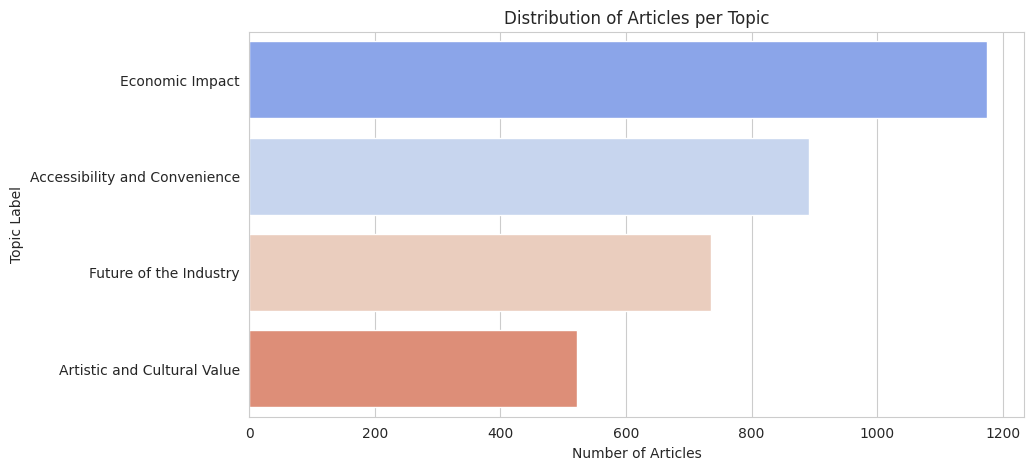

<ipython-input-49-fecdf5416674>:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




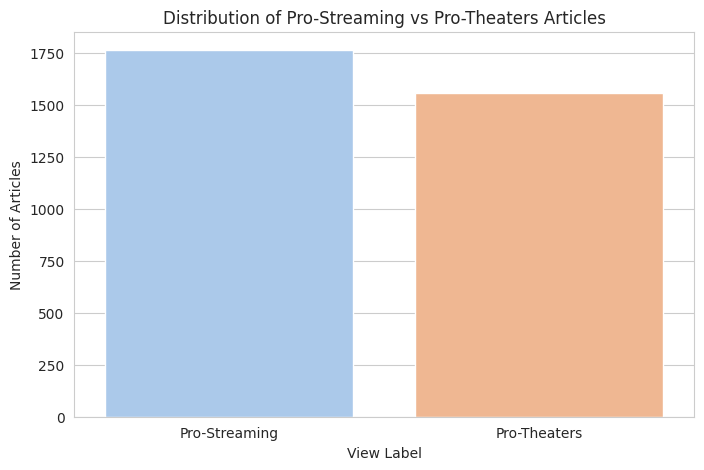

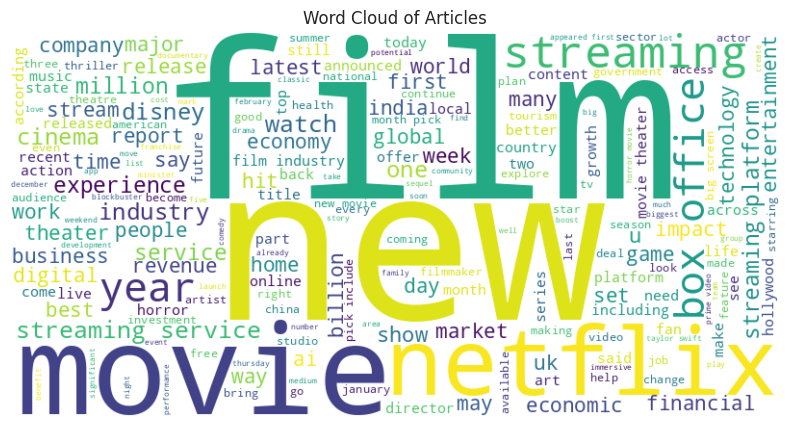

<ipython-input-49-fecdf5416674>:61: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




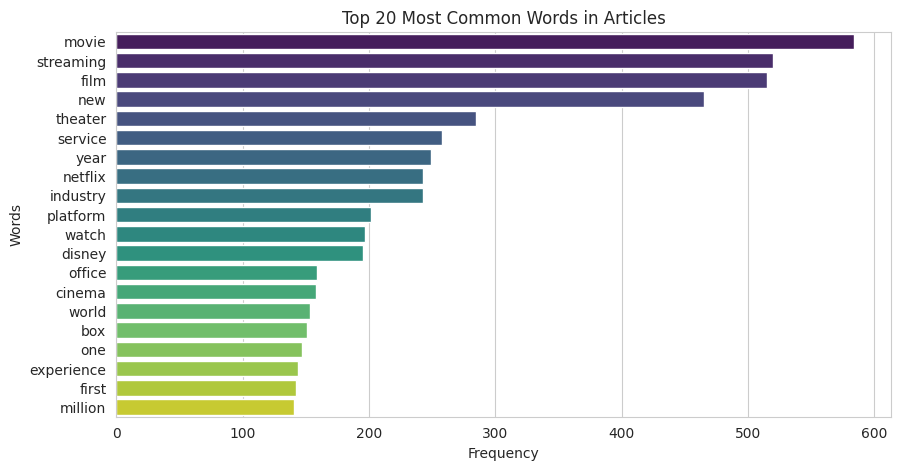

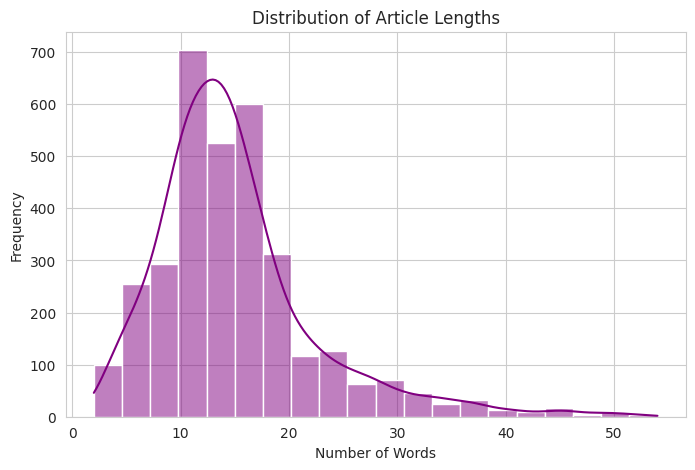

<ipython-input-49-fecdf5416674>:86: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




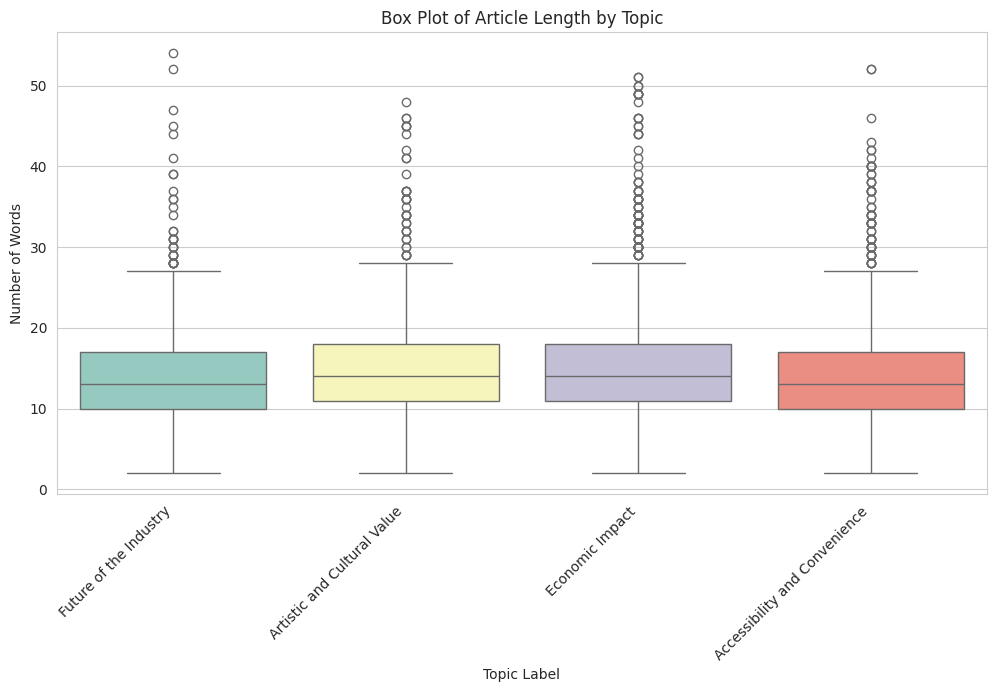

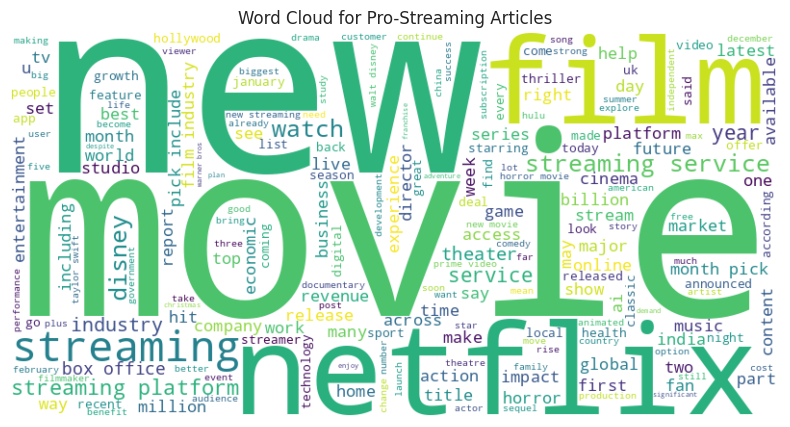

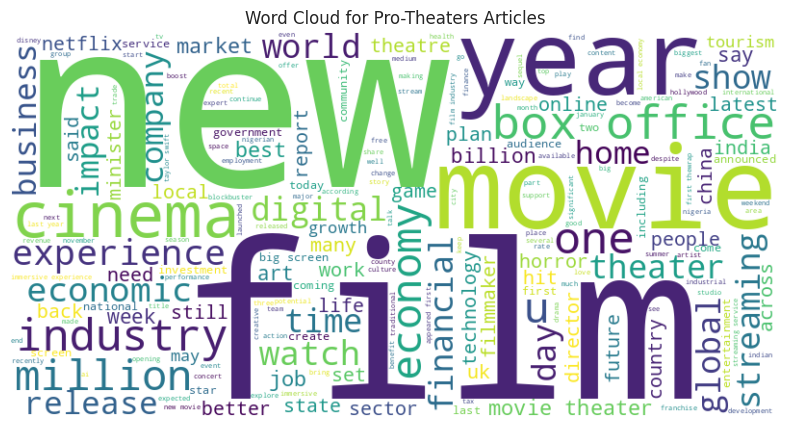

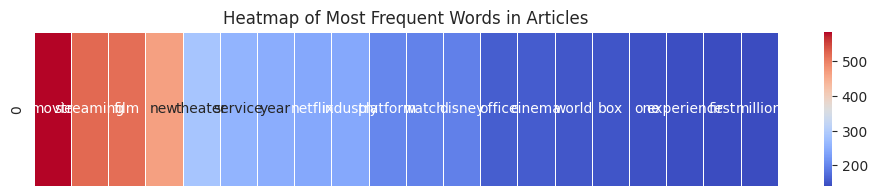

<ipython-input-49-fecdf5416674>:136: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




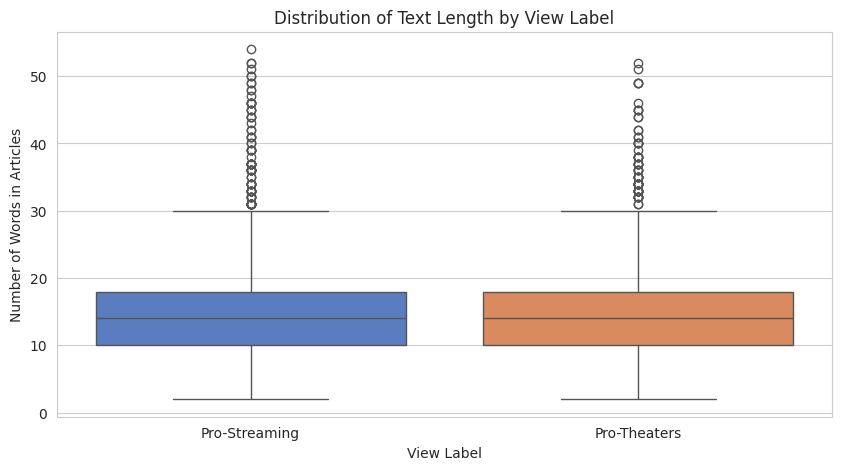

<ipython-input-49-fecdf5416674>:144: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-49-fecdf5416674>:145: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




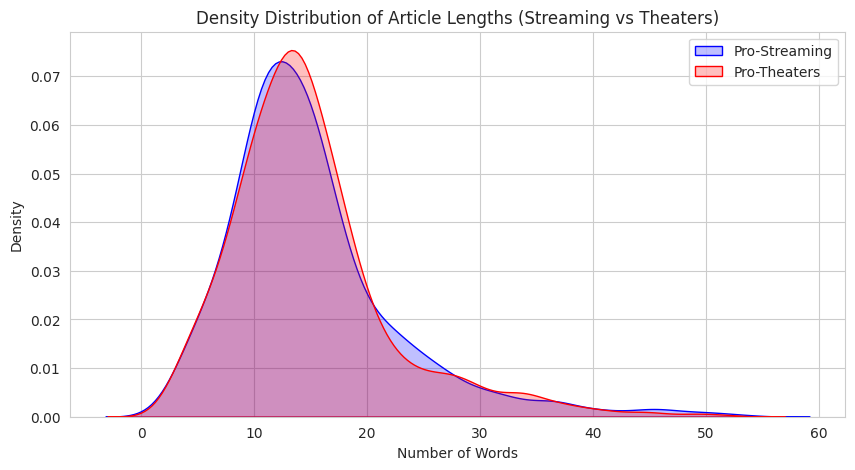

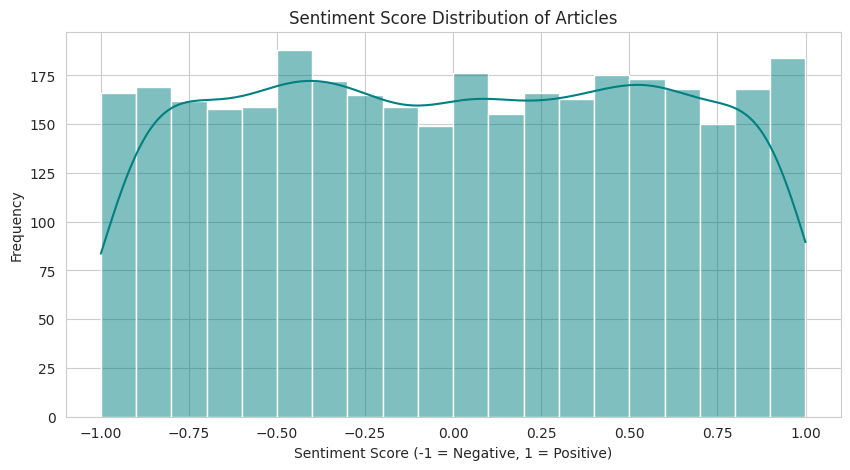

<Figure size 1200x600 with 0 Axes>

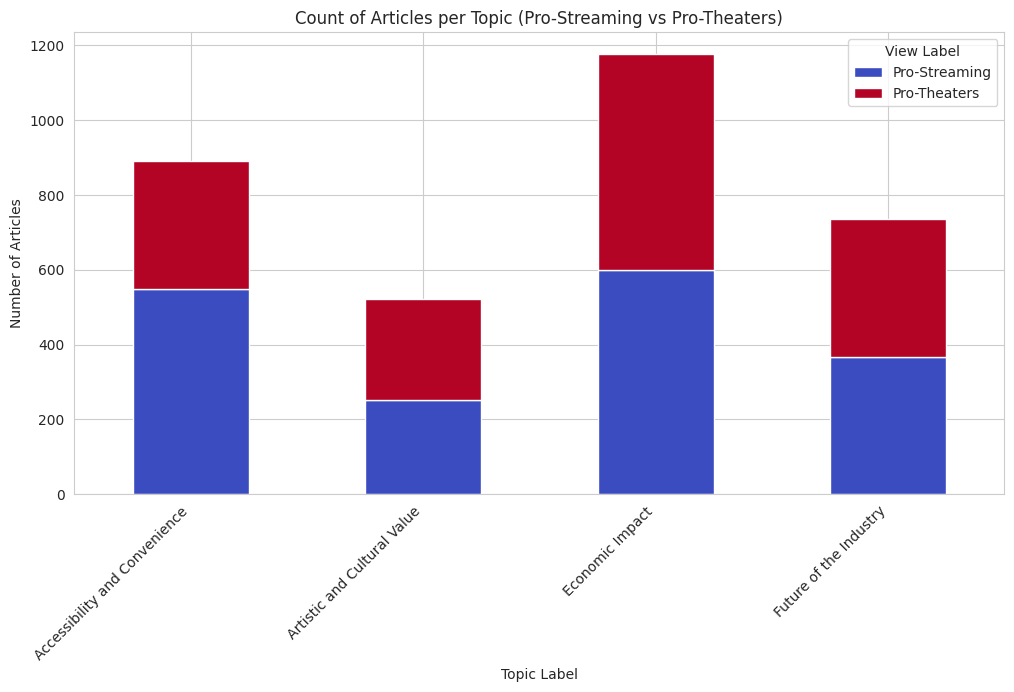

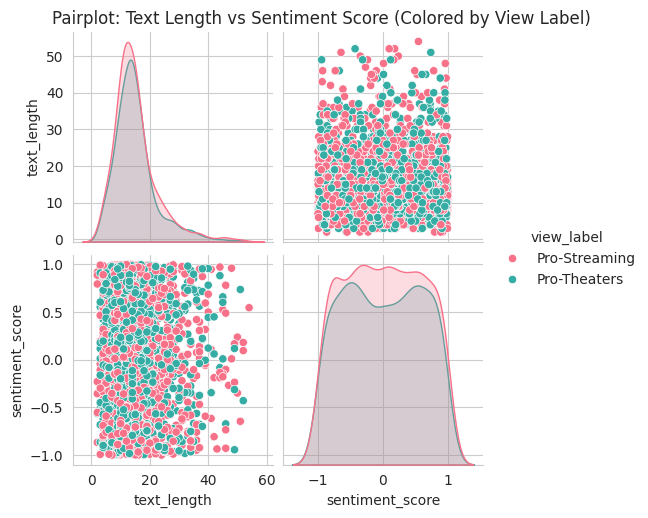

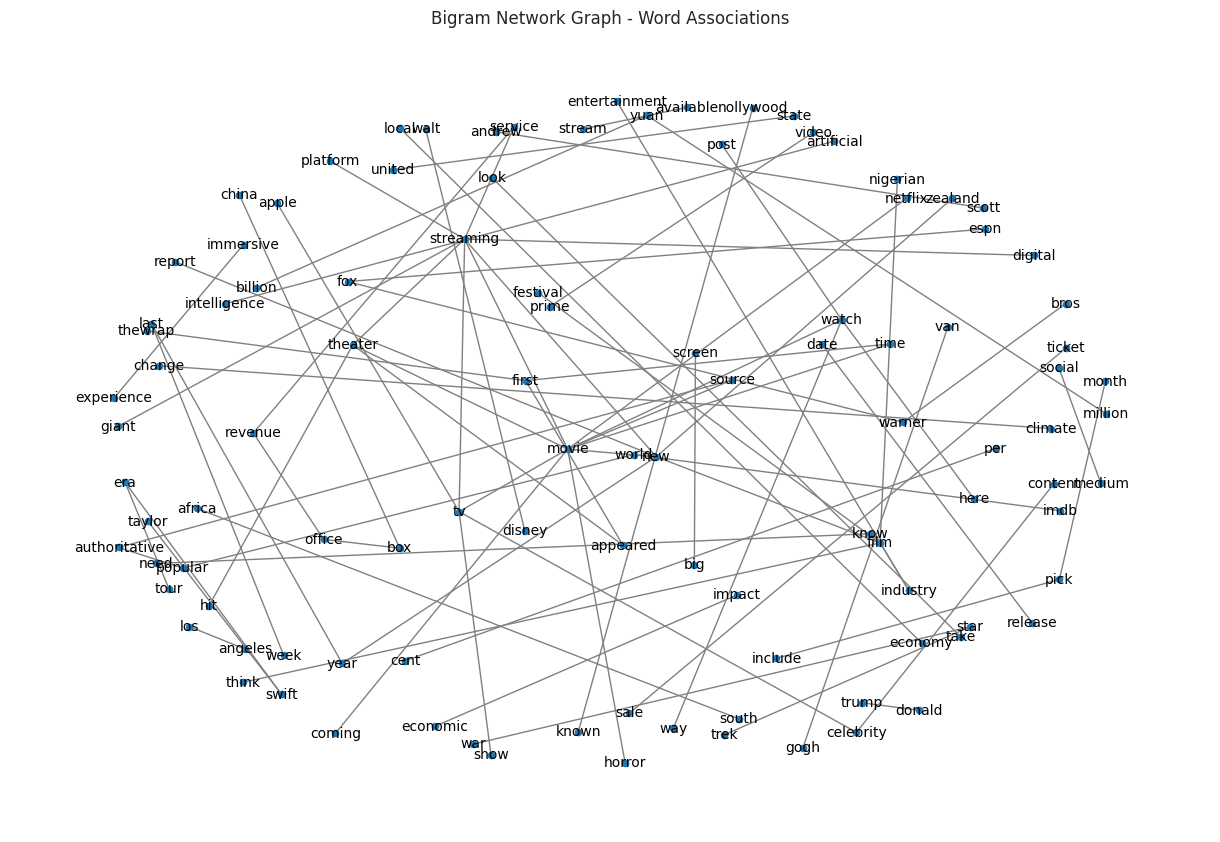

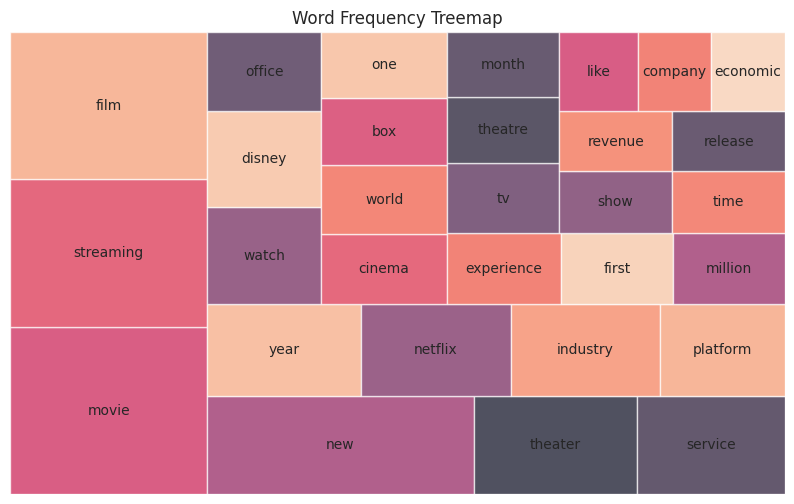

<ipython-input-49-fecdf5416674>:203: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




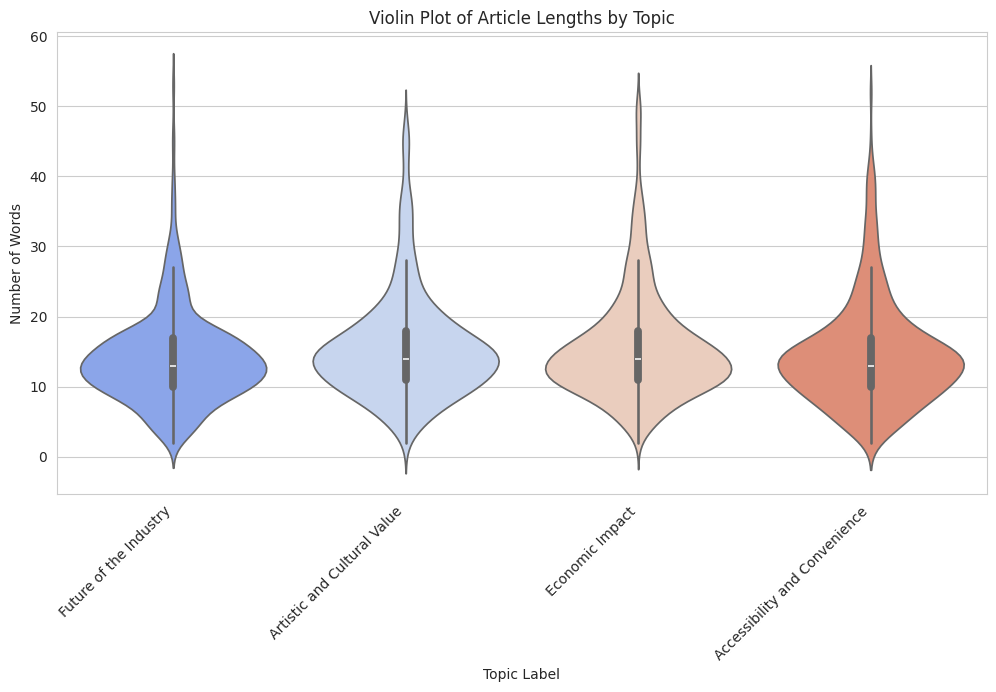

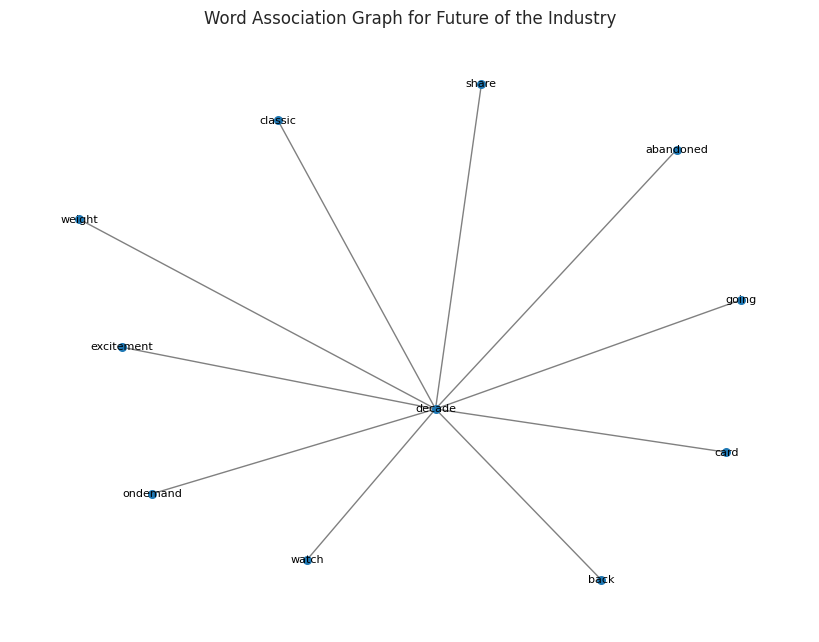

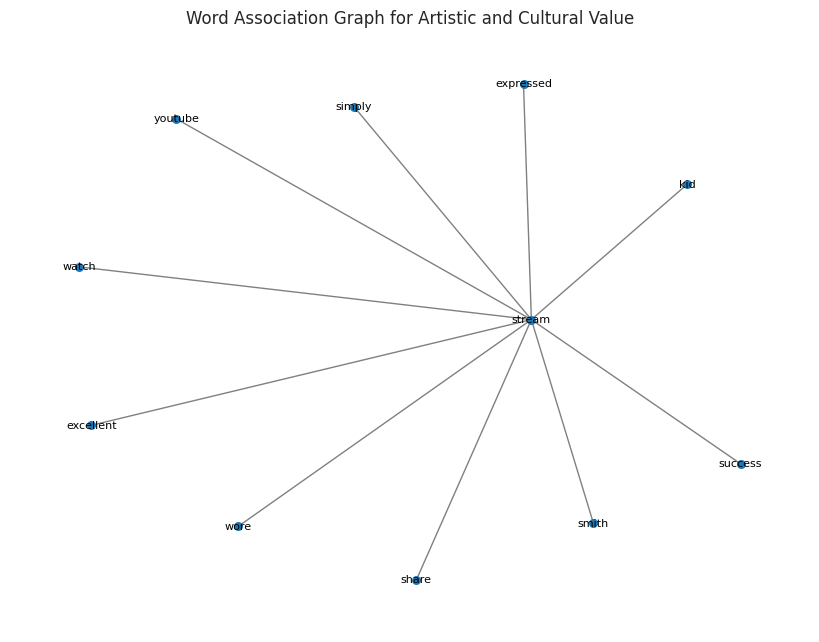

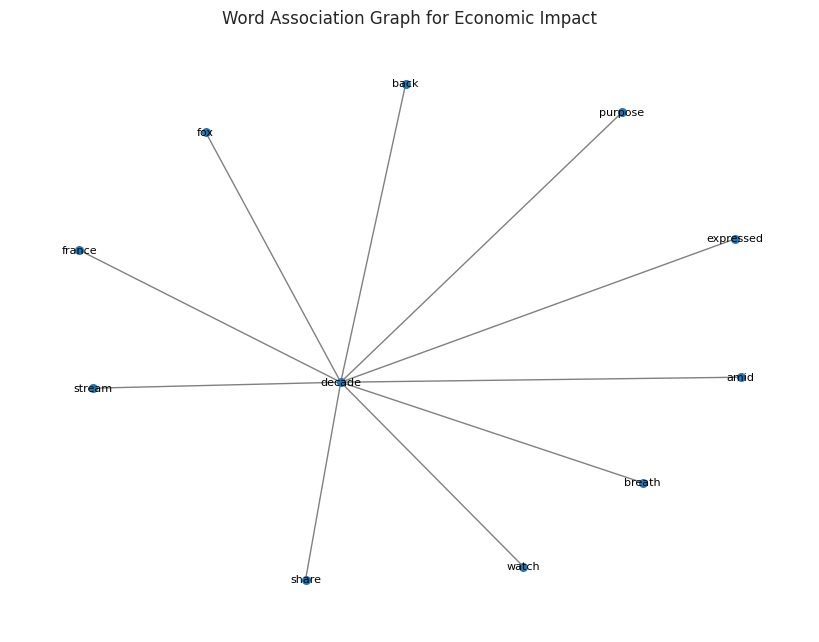

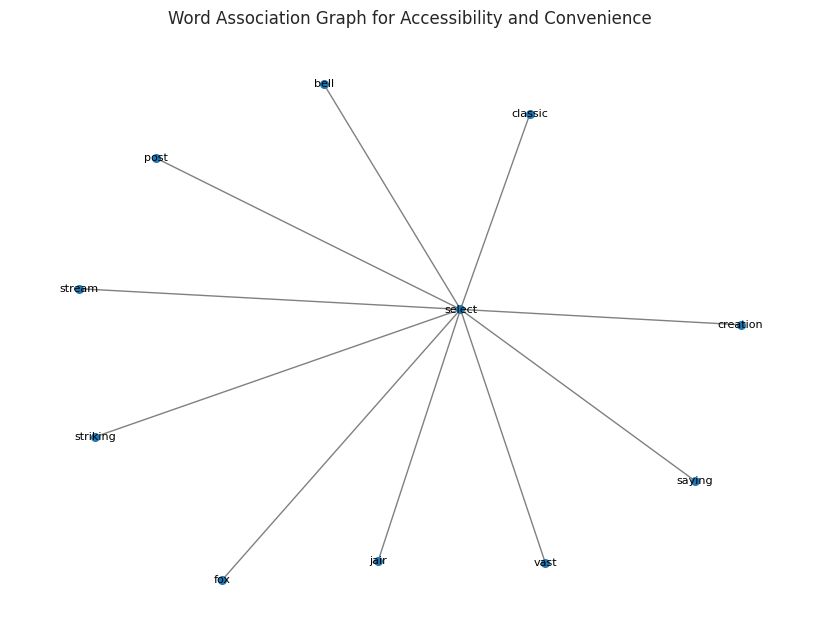

In [52]:
visualization_paths = generate_visualizations(df_lemmatized)

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to generate insightful visualizations from the vectorized data
def generate_vectorized_visualizations(df_vectorized, title_prefix):
    visualizations = []

    # 1. Distribution of Articles per Topic (After Vectorization)
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df_vectorized["topic_label"], order=df_vectorized["topic_label"].value_counts().index, palette="coolwarm")
    plt.title(f"{title_prefix} - Distribution of Articles per Topic")
    plt.xlabel("Number of Articles")
    plt.ylabel("Topic Label")
    plt.show()

    # 2. Distribution of Articles per View Label (Streaming vs Theaters)
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df_vectorized["view_label"], palette="pastel")
    plt.title(f"{title_prefix} - Distribution of Pro-Streaming vs Pro-Theaters Articles")
    plt.xlabel("View Label")
    plt.ylabel("Number of Articles")
    plt.show()

    # 3. Top 20 Most Important Words (After Vectorization)
    word_importance = df_vectorized.drop(columns=["topic_label", "view_label"]).sum().sort_values(ascending=False).head(20)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=word_importance.values, y=word_importance.index, palette="viridis")
    plt.title(f"{title_prefix} - Top 20 Most Important Words (Vectorized)")
    plt.xlabel("Word Frequency / TF-IDF Score")
    plt.ylabel("Words")
    plt.show()

    # 4. Heatmap of Top 20 Words Across Topics
    top_words = word_importance.index
    word_matrix = df_vectorized.groupby("topic_label")[top_words].mean()

    plt.figure(figsize=(12, 6))
    sns.heatmap(word_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    plt.title(f"{title_prefix} - Heatmap of Top Words Across Topics")
    plt.xlabel("Words")
    plt.ylabel("Topic Label")
    plt.xticks(rotation=45, ha="right")
    plt.show()






Generating CountVectorizer Visualizations...


<ipython-input-55-adbad1829fec>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




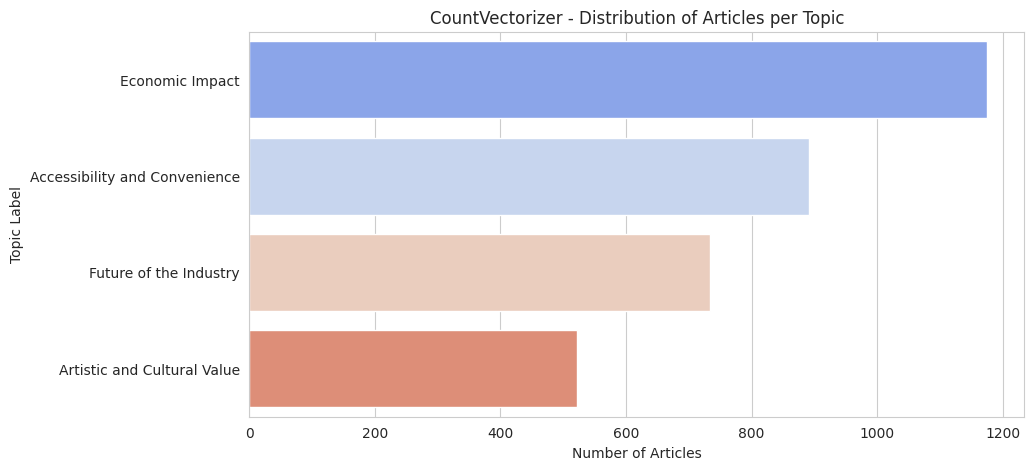

<ipython-input-55-adbad1829fec>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




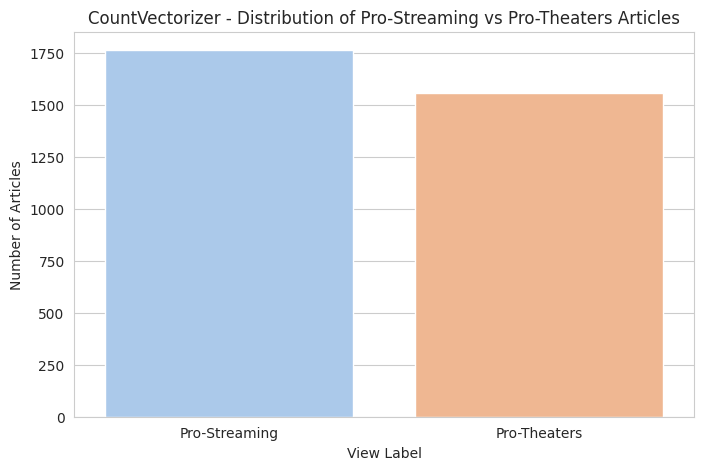

<ipython-input-55-adbad1829fec>:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




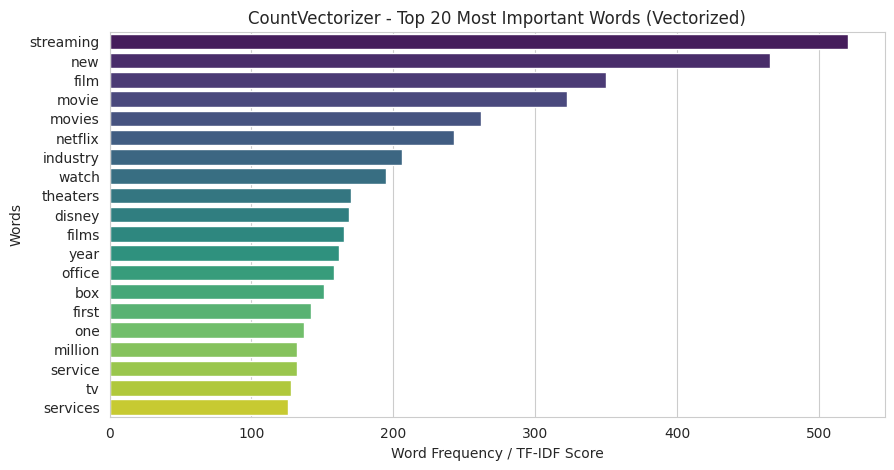

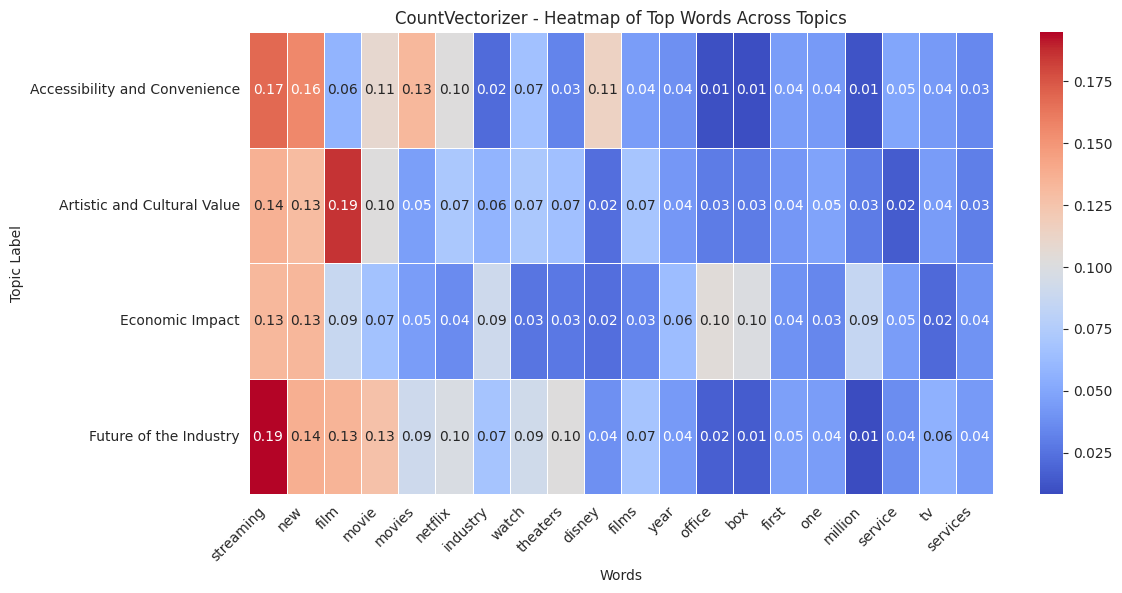

In [56]:

# Generate visualizations for Count Vectorized Data
print("Generating CountVectorizer Visualizations...")
generate_vectorized_visualizations(df_count_vectorized, "CountVectorizer")



Generating TF-IDF Vectorizer Visualizations...


<ipython-input-55-adbad1829fec>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




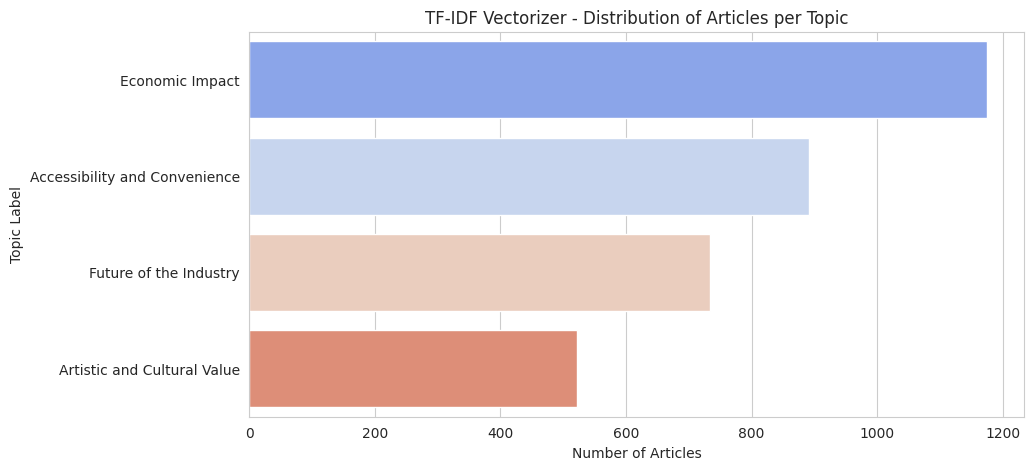

<ipython-input-55-adbad1829fec>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




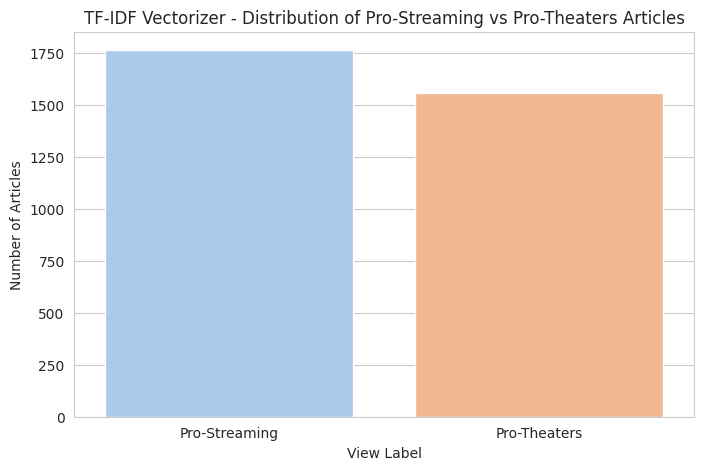

<ipython-input-55-adbad1829fec>:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




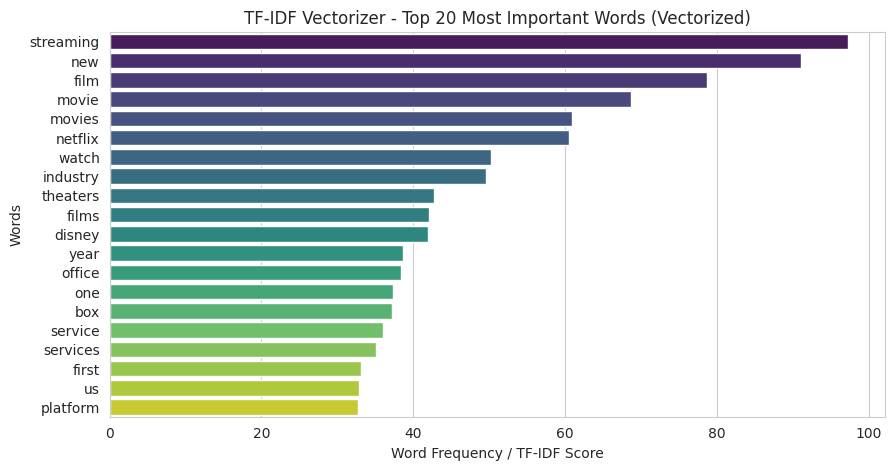

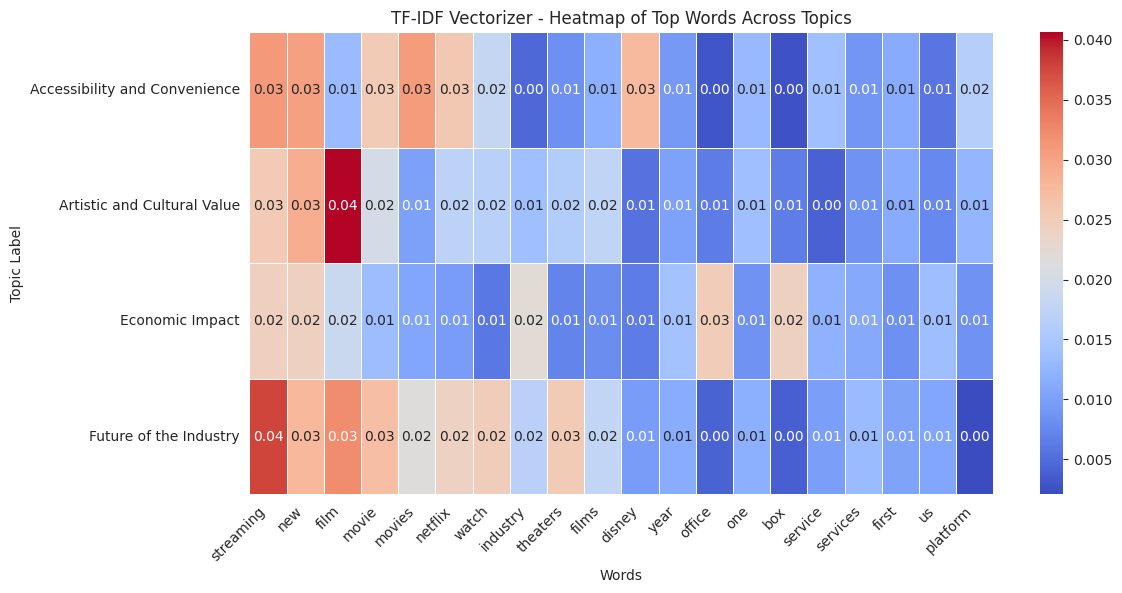

In [57]:
# Generate visualizations for TF-IDF Vectorized Data
print("Generating TF-IDF Vectorizer Visualizations...")
generate_vectorized_visualizations(df_tfidf_vectorized, "TF-IDF Vectorizer")